# Exercício *Iris*

- 50 amostras de 3 espécies diferentes de íris (150 amostras no total)
- Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala

![](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/e43b96424ad781f57d492ce36351693aad01902a/images/03_iris.png)

## Aprendizado de máquina no conjunto de dados da íris

Enquadrado como um problema de **aprendizado supervisionado**: Preveja as espécies de uma íris usando as suas medidas. 

- Famoso conjunto de dados para aprendizado de máquina porque a previsão é **fácil**
- Saiba mais sobre o conjunto de dados da íris: [UCI Machine Learning Repository] (http://archive.ics.uci.edu/ml/datasets/Iris)
- Cada linha é uma **observação** (também conhecida como: exemplo, amostra, sample)
- Cada coluna é uma **feature** (também conhecido como: preditor, atributo, variável independente)
- Cada valor que estamos prevendo é a resposta (também conhecida como: target, outcome, label, dependent variable)
- A classificação é um aprendizado supervisionado no qual a resposta é categórica
- Regressão é a aprendizagem supervisionada em que a resposta é ordenada e contínua

# **Resolução do Exercício do Iris DataSet  **

**Importa a função train_test_split e cria variáveis de treinamento e de teste**   
X_train = 120 registros para treinamento (80%)  
X_test = 30 registros para testes (20%)  
y_train = 120 labels/targets para treinamento (80%)  
y_test = 30 registros para treinamento (80%)  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import collections 
import numpy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.8, random_state=42)

# **Crie um classificador capaz de separar as 3 classes de plantas.**

**Cria o classificador por SVM e treina com os datasets e labels de testes, e também mostra o score do modelo/classificador**

In [2]:
from sklearn import svm

classifier_svm = svm.SVC(probability=True)
classifier_svm.fit(X_train, y_train)
classifier_svm.score(X_test, y_test)


0.975

**Cria o classificador por Linear Regression e treina com os datasets e labels de testes,  e também mostra o score do modelo/classificador**

In [3]:
from sklearn.linear_model import LinearRegression

classifier_linear_regression = LinearRegression(fit_intercept=True, normalize=False)
classifier_linear_regression.fit(X_train, y_train)
classifier_linear_regression.score(X_test, y_test)

0.9127118690263774

# **Apresenteas métricas de validação Matriz de Confusão, Precision/Recall, F1 e ROC para este classificador.**


**Importa a função plot_confusion_matrix **

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

**Plota a confusion matrix**

Confusion matrix, without normalization
[[43  0  0]
 [ 0 36  3]
 [ 0  0 38]]


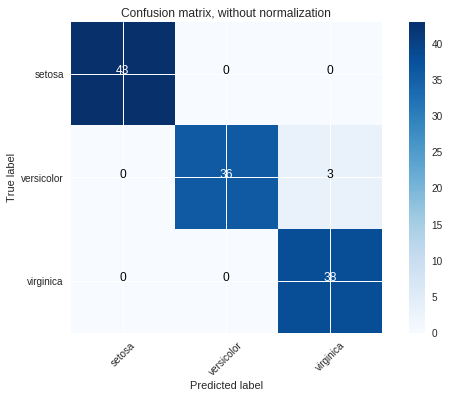

In [0]:
y_pred = classifier_svm.fit(X_train, y_train).predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

class_names = iris.target_names

plot_confusion_matrix(cnf_matrix, classes=number_digits,
                      title='Confusion matrix, without normalization')